In [12]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE

import numpy as np
from copy import deepcopy
from IPython.display import HTML



np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
# logging.getLogger().setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

In [2]:
cg = ContactGraph.load_from_file(ContactGraphGeneratorParams.graph_file_path_from_name("cg_maze_a2"))

INFO:large_gcs.graph.contact_graph:Loading 35 contact pair modes for 4 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 1234 sets...
100%|██████████| 1234/1234 [00:01<00:00, 717.22it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 1236/1236 [00:00<00:00, 12683.33it/s]
INFO:large_gcs.graph.graph:Adding 1236 vertices to graph...
100%|██████████| 1236/1236 [00:00<00:00, 9152.78it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 98676/98676 [00:10<00:00, 9198.59it/s] 
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 98676/98676 [00:17<00:00, 5745.35it/s]
INFO:large_gcs.graph.graph:Adding 98676 edges to graph...
100%|██████████| 98676/98676 [00:18<00:00, 5421.69it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_vertices=1236, n_edges=98676, source=[array([1.600, 0.600]), array([3.250, 0.000])], target=[array([-2.300, -0.700]), ar

In [3]:
# ws_x = 4
# ws_y = 3
# params = ContactGraphGeneratorParams(
#     name="cg_trichal2",
#     obs_vertices=[[[-1, 2], [-1, -1], [2, 2]]],
#     obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
#     rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
#     source_obj_pos=[[3.25, 0]],
#     source_rob_pos=[[1.5, 0.5]],
#     target_obj_pos=[[-1.5, 0]],
#     target_rob_pos=[[-3, 0]],
#     n_pos_per_set=2,
#     workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
# )

# generator = ContactGraphGenerator(params)
# generator.plot()

In [4]:
# ws_x = 4
# ws_y = 3
# params = ContactGraphGeneratorParams(
#     name="cg_maze_a2",
#     obs_vertices=[
#         [[-2, -2.7], [2.2, 2.6], [-1.3, 0.5]],
#         [[0.5, -2], [2.7, -1.2], [2.4, 0.3]],
#     ],
#     obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
#     rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
#     source_obj_pos=[[1.6, 0.6]],
#     source_rob_pos=[[3.25, 0]],
#     target_obj_pos=[[-2.3, -0.7]],
#     target_rob_pos=[[-0.5, 2]],
#     n_pos_per_set=2,
#     workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
# )

# generator = ContactGraphGenerator(params)
# generator.plot()

In [5]:
# for i, obj in enumerate(params.obj_vertices):
#     obj_only_params = deepcopy(params)
#     obj_only_params.name = f"{params.name}_obj{i}_only"
#     obj_only_params.rob_vertices = []
#     obj_only_params.source_rob_pos = []
#     obj_only_params.target_rob_pos = []
#     generator = ContactGraphGenerator(obj_only_params)
#     generator.plot()
#     generator.generate()

# for i, rob in enumerate(params.rob_vertices):
#     rob_only_params = deepcopy(params)
#     rob_only_params.name = f"{params.name}_rob{i}_only"
#     rob_only_params.obj_vertices = []
#     rob_only_params.source_obj_pos = []
#     rob_only_params.target_obj_pos = []
#     generator = ContactGraphGenerator(rob_only_params)
#     generator.plot()
#     generator.generate()

In [6]:
from large_gcs.cost_estimators.factored_collision_free_ce import FactoredCollisionFreeCE

cost_estimator = FactoredCollisionFreeCE(cg)

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 10/10 [00:00<00:00, 11828.27it/s]
INFO:large_gcs.graph.graph:Adding 10 vertices to graph...
100%|██████████| 10/10 [00:00<00:00, 15414.57it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 45/45 [00:00<00:00, 764.16it/s]
INFO:large_gcs.graph.contact_graph:46 edges generated
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 46/46 [00:00<00:00, 16708.93it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 46/46 [00:00<00:00, 7480.54it/s]
INFO:large_gcs.graph.graph:Adding 46 edges to graph...
100%|██████████| 46/46 [00:00<00:00, 9263.39it/s]
INFO:large_gcs.graph.factored_collision_free_graph:Created factored collision free graph for obj0: GraphParams(dim_bounds=(2, 6), n_vertices=10, n_edges=46, source=None, target=[array([-2.300, -0.700])], workspace=array([[-4,  4],
       [-3,  3]]), default_costs_constraints=None)
IN

In [9]:
fcfg = cost_estimator._collision_free_graphs[0]
fcfg.vertex_names
# fcfg.plot()

["('NC|obs0_f0-obj0_v3', 'NC|obs1_f0-obj0_v3')",
 "('NC|obs0_f0-obj0_v3', 'NC|obs1_f1-obj0_v0')",
 "('NC|obs0_f0-obj0_v3', 'NC|obs1_f2-obj0_v1')",
 "('NC|obs0_f1-obj0_v1', 'NC|obs1_f0-obj0_v3')",
 "('NC|obs0_f1-obj0_v1', 'NC|obs1_f1-obj0_v0')",
 "('NC|obs0_f1-obj0_v1', 'NC|obs1_f2-obj0_v1')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs1_f0-obj0_v3')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs1_f1-obj0_v0')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs1_f2-obj0_v1')",
 'target']

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpd3m7tnc1/temp.m4v


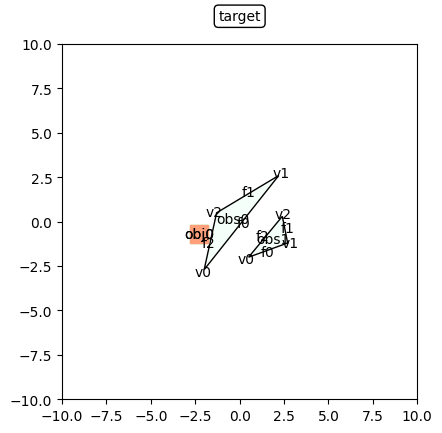

In [17]:
fcfg.set_source(fcfg.vertex_names[-3])
ws = 10
fcfg.workspace = np.array([[-ws, ws], [-ws, ws]])
sol = fcfg.solve()
anim = fcfg.animate_solution()
HTML(anim.to_html5_video())

In [8]:
# cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
# gcs_astar = GcsAstarConvexRestriction(
#     cg,
#     cost_estimator=cost_estimator,
#     should_reexplore=True,
# )
# sol = gcs_astar.run()